Содержание:

 - Задание Ultra pro
 - Импорт библиотек и подключение google диска
 - Прогнозирования трафика
   - Работа с таблицей
   - График таблицы
   - Загрузка данных
   - Дополнительные функции визуализации результатов
 - Нейронная сеть с Dense слоем
   - lr=1e-4
   - Уменьшаем шаг обучения lr=1e-5
   - Уменьшаем шаг обучения lr=1e-6
     - График lr=1e-6
   - Прогноз данных, отображение на графике
   - График корреляции
   - График корреляции со смещением шага
 - Одномерная свертка Conv1D
   - Шаг обучения lr=1e-4  
   - Меняем шаг обучения lr=1e-5
    - График lr=1e-5
   - Прогноз данных, отображение на графике (lr=1e-5)
   - График корреляции (lr=1e-5)
   - График корреляции со смещением шага (lr=1e-5)
 - LSTM сеть
   - Меняем шаг обучения lr=1e-5
     - График lr=1e-5
   - Прогноз данных, отображение на графике (lr=1e-5)
   - График корреляции (lr=1e-5)
  - График корреляции со смещением шага (lr=1e-5)
 - Промежуточные выводы:
  - Работа с таблицей (добавление каналов)
  - Добавление каналов
  - Загрузка данных
 - Новые серии экспериментов
 - Нейронная сеть с Dense слоем
  - lr=1e-4
  - Уменьшаем шаг обучения lr=1e-5
  - Уменьшаем шаг обучения lr=1e-6
    - График lr=1e-6
  - Прогноз данных, отображение на графике
  - График корреляции
  - График корреляции со смещением шага
 - Одномерная свертка Conv1D
  - Шаг обучения lr=1e-4
  - Меняем шаг обучения lr=1e-5
    - График lr=1e-5
  - Прогноз данных, отображение на графике (lr=1e-5)
  - График корреляции (lr=1e-5)
  - График корреляции со смещением шага (lr=1e-5)
 - LSTM сеть
   - Меняем шаг обучения lr=1e-5
     - График lr=1e-5
   - Прогноз данных, отображение на графике (lr=1e-5)
   - График корреляции (lr=1e-5)
   - График корреляции со смещением шага (lr=1e-5)
 - Выводы:


# Задание **Ultra pro**

Возьмите базу трафика с сайта компании. Напишите модель для прогнозирования трафика. 

Возьмите **xLen = 60**. Добейтесь максимально точного соответствия между графиками корреляции исходного сигнала и прогноза.

# Импорт библиотек и подключение google диска

In [ ]:
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D, RepeatVector, Input, concatenate
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Прогнозирования трафика 

## Работа с таблицей

Для начала загрузим таблицу и посмотрим какие в ней присутсивуют данные.

In [ ]:
# Считываем данные и присваеваем переменной с помощью pandas
data = pd.read_csv('/content/drive/MyDrive/Временные ряды/База трафик сайта/traff.csv', sep=',') 

In [ ]:
data.head()

,1/1/2017,"22,226.00"
0,1/2/2017,"29,593.00"
1,1/3/2017,"31,726.00"
2,1/4/2017,"32,684.00"
3,1/5/2017,"31,820.00"
4,1/6/2017,"29,354.00"


In [ ]:
# Узнаем размер 
data.shape

(1094, 2)

In [ ]:
# Тип данных
data.dtypes

1/1/2017     object
22,226.00    object
dtype: object

Видим что данные обоих столбцов имеют тип **odject**

In [ ]:
# Проверим есть ли пустые якейки
data.isna().sum()

1/1/2017     0
22,226.00    0
dtype: int64

In [ ]:
# Зададим новое название столбцов
data.columns=['Дата', 'Посещений']

In [ ]:
data.head()

,Дата,Посещений
0,1/2/2017,"29,593.00"
1,1/3/2017,"31,726.00"
2,1/4/2017,"32,684.00"
3,1/5/2017,"31,820.00"
4,1/6/2017,"29,354.00"


In [ ]:
# Удалим первый столбец с датой, так как нам эти данные не так важны
data.drop(['Дата'], axis=1, inplace=True)

In [ ]:
data.head()

,Посещений
0,"29,593.00"
1,"31,726.00"
2,"32,684.00"
3,"31,820.00"
4,"29,354.00"


In [ ]:
# data.iloc[0,0] как пример вывода значения

'29,593.00'

***Из таблицы видно что в данных присутствует запятая в каждой ячейки, что не дает перевести в числовой формат***

In [ ]:
# C помощью цикла for пройдемся по всем строкам и удалим знак запятой из всех значений

for i in range(len(data)):
  data.iloc[i,0] = data.iloc[i,0].replace(',','')

In [ ]:
# Так как тип данных object и они только целочисленные (дробная часть отсутствует), потому что посещений может быть  
# только целое число, то требуется изменить типо данных для дальнейшей работы.

In [ ]:
# Так как стоит точка, то нельзя сразу перевести в int, для этого сделаем двойное преобразование,
# Сначла в типо float, а затем в int.
data = data.astype(float).astype(int)

In [ ]:
data.head()

,Посещений
0,29593
1,31726
2,32684
3,31820
4,29354


In [ ]:
# Теперь можно перевсти в numpy массив
data = np.array(data)

## График таблицы

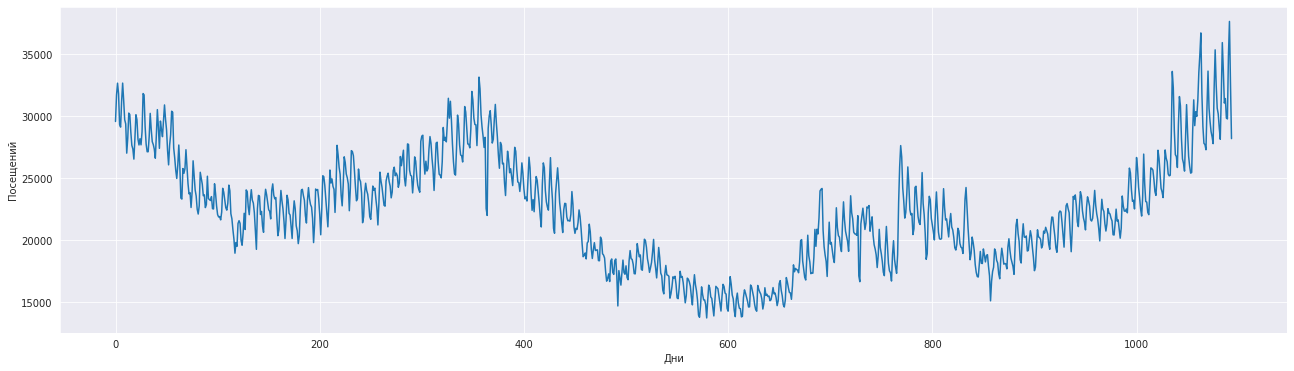

In [ ]:
# Отобразим исходные данные на графике

plt.figure(figsize=(22,6))
plt.plot(data)

plt.ylabel('Посещений')
plt.xlabel('Дни')
plt.show()


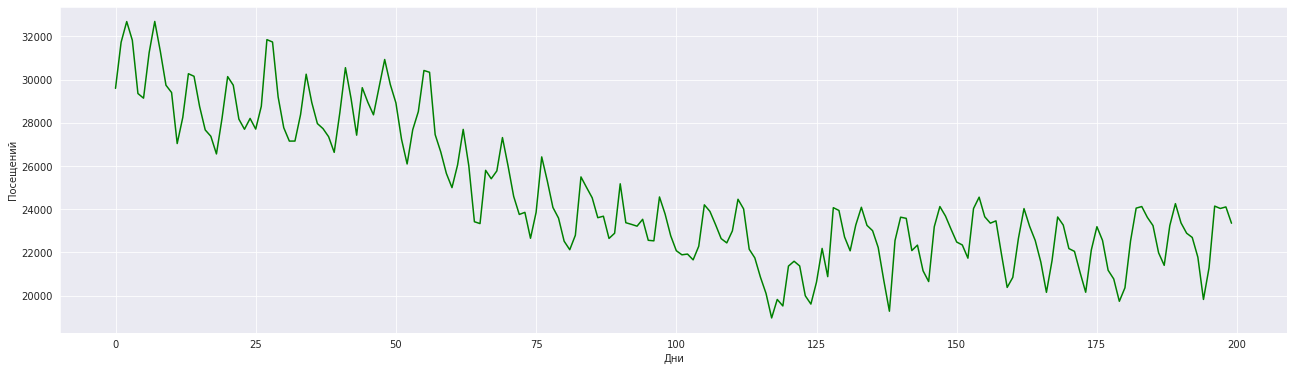

In [ ]:
# В более конкретные дни

start = 0  
lenght = 200

plt.figure(figsize=(22,6))
plt.plot(data[start:start+lenght], color='g')

plt.ylabel('Посещений')
plt.xlabel('Дни')
plt.show()



## Загрузка данных

Из задания: Возьмите **xLen = 60**. Добейтесь максимально точного соответствия между графиками корреляции исходного сигнала и прогноза.

In [ ]:
xLen = 60

# Так как общая выборка составлят 1094, то возьмем примерно 20% на проверочную
valLen = 218

trainLen = data.shape[0] - valLen  # Определяем размер тренировночной выборки
print(trainLen)

876


In [ ]:
# Разделение на тренировночную и тестовую выборки
xTrain, xTest = data[:trainLen], data[trainLen+xLen+2:]

In [ ]:
# Нормализуем тренировочные данные
xScaler = MinMaxScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

In [ ]:
print(xTrain.shape)
print(xTest.shape)

(876, 1)
(156, 1)


In [ ]:
# Разделение ответов на тренировочную и тестовую
#yTrain, yTest = data[:trainLen], data[trainLen+xLen+2]
yTrain, yTest = np.reshape(data[:trainLen],(-1,1)), np.reshape(data[trainLen+xLen+2:],(-1,1))

# Так как канал у нас один, то получились одинаковые xTrain, yTrain и xTest, yTest

In [ ]:
# Нормализуем провероные данные
yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)

In [ ]:
print(yTrain.shape)
print(yTest.shape)

(876, 1)
(156, 1)


In [ ]:
trainDataGen = TimeseriesGenerator(xTrain, yTrain, length=xLen, stride=1, sampling_rate=1, batch_size=20)

In [ ]:
testDataGen = TimeseriesGenerator(xTest, yTest, length=xLen, stride=1)

In [ ]:
# Узнаем размер
print(trainDataGen[0][0].shape)
print(trainDataGen[0][1].shape)
print(testDataGen[0][0].shape)
print(testDataGen[0][1].shape)

(96, 60, 1)
(96, 1)
(96, 60, 1)
(96, 1)


In [ ]:
# Сразу получим значения и переведем в numpy массив для проверки
DataGen = TimeseriesGenerator(xTest, yTest, length=xLen, sampling_rate=1, batch_size=len(xTest))
xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])
xVal = np.array(xVal)
yVal = np.array(yVal)

## Дополнительные функции визуализации результатов

In [ ]:
# Функция для рассчета результата прогнозирования сети
def getPred(currModel, xVal, yVal, yScaler):
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)
  return (predVal, yValUnscaled)                  # Возврат предсказанного результата и реальных данных

In [ ]:
# Функция визуализации графиков предсказания и реальных данных
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.figure(figsize=(22,6))
  plt.plot(predVal[start:start+step, 0], label = 'Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], label='Базовый ряд')
  plt.xlabel('Время')
  plt.ylabel('Значение Close')
  plt.legend()
  plt.show()

In [ ]:
# Рассчет корреляции двух векторов
def correlate(a,b):
  ma = a.mean()
  mb = b.mean()
  mab = (a*b).mean()
  sa = a.std()
  sb = b.std()

  val = 1
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb) / (sa*sb)
  return val

In [ ]:
# Функция отрисовки графика корреляции со смещением шага для проверки автокорреляции
def showCorr(channels, corrSteps, predVal, yValUnscaled):
  for ch in channels:
    corr = [] 
    yLen = yValUnscaled.shape[0] 

    # C помощью цикла изменяем шаг
    for i in range(corrSteps):
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, 0]))

    own_corr = []  # Список для эталонного графика автокорреляции, к которому нужно стремиться

    for i in range(corrSteps):
      own_corr.append(correlate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:, ch]))

    plt.figure(figsize=(14,7))
    plt.plot(corr, label='Предсказание на ' + str(ch+1) + ' шаг')   # Для предсказанных значений
    plt.plot(own_corr, label='Эталон')                              # Для эталона

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

## Нейронная сеть с Dense слоем



In [ ]:
modelD = Sequential()
modelD.add(Dense(150,input_shape=(xLen,1), activation='relu'))
modelD.add(Flatten())
modelD.add(Dense(1, activation='linear'))

modelD.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

### lr=1e-4

In [ ]:
historyD = modelD.fit(trainDataGen, epochs=200,verbose=1, validation_data=testDataGen)

Epoch 1/200
1/1 [==============================] - 0s 467ms/step - loss: 0.7166 - val_loss: 0.6674
Epoch 2/200
1/1 [==============================] - 0s 61ms/step - loss: 0.6674 - val_loss: 0.6200
Epoch 3/200
1/1 [==============================] - 0s 50ms/step - loss: 0.6200 - val_loss: 0.5745
Epoch 4/200
1/1 [==============================] - 0s 55ms/step - loss: 0.5745 - val_loss: 0.5309
Epoch 5/200
1/1 [==============================] - 0s 52ms/step - loss: 0.5309 - val_loss: 0.4893
Epoch 6/200
1/1 [==============================] - 0s 51ms/step - loss: 0.4893 - val_loss: 0.4495
Epoch 7/200
1/1 [==============================] - 0s 49ms/step - loss: 0.4495 - val_loss: 0.4117
Epoch 8/200
1/1 [==============================] - 0s 57ms/step - loss: 0.4117 - val_loss: 0.3759
Epoch 9/200
1/1 [==============================] - 0s 58ms/step - loss: 0.3759 - val_loss: 0.3420
Epoch 10/200
1/1 [==============================] - 0s 50ms/step - loss: 0.3420 - val_loss: 0.3100
Epoch 11/200
1/1 [

### Уменьшаем шаг обучения lr=1e-5

In [ ]:
modelD.compile(loss='mse', optimizer=Adam(learning_rate=1e-5))
historyD = modelD.fit(trainDataGen, epochs=200, verbose=1, validation_data=testDataGen)

Epoch 1/200
1/1 [==============================] - 0s 456ms/step - loss: 0.0137 - val_loss: 0.0137
Epoch 2/200
1/1 [==============================] - 0s 48ms/step - loss: 0.0137 - val_loss: 0.0136
Epoch 3/200
1/1 [==============================] - 0s 48ms/step - loss: 0.0136 - val_loss: 0.0136
Epoch 4/200
1/1 [==============================] - 0s 49ms/step - loss: 0.0136 - val_loss: 0.0136
Epoch 5/200
1/1 [==============================] - 0s 58ms/step - loss: 0.0136 - val_loss: 0.0135
Epoch 6/200
1/1 [==============================] - 0s 50ms/step - loss: 0.0135 - val_loss: 0.0135
Epoch 7/200
1/1 [==============================] - 0s 56ms/step - loss: 0.0135 - val_loss: 0.0135
Epoch 8/200
1/1 [==============================] - 0s 54ms/step - loss: 0.0135 - val_loss: 0.0134
Epoch 9/200
1/1 [==============================] - 0s 50ms/step - loss: 0.0134 - val_loss: 0.0134
Epoch 10/200
1/1 [==============================] - 0s 58ms/step - loss: 0.0134 - val_loss: 0.0134
Epoch 11/200
1/1 [

### Уменьшаем шаг обучения lr=1e-6

In [ ]:
modelD.compile(loss='mse', optimizer=Adam(learning_rate=1e-6))
historyD = modelD.fit(trainDataGen, epochs=100, verbose=1, validation_data=testDataGen)

Epoch 1/100
1/1 [==============================] - 1s 727ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 2/100
1/1 [==============================] - 0s 63ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 3/100
1/1 [==============================] - 0s 52ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 4/100
1/1 [==============================] - 0s 59ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 5/100
1/1 [==============================] - 0s 64ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 6/100
1/1 [==============================] - 0s 53ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 7/100
1/1 [==============================] - 0s 51ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/100
1/1 [==============================] - 0s 52ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/100
1/1 [==============================] - 0s 49ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 10/100
1/1 [==============================] - 0s 53ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 11/100
1/1 [

#### График lr=1e-6

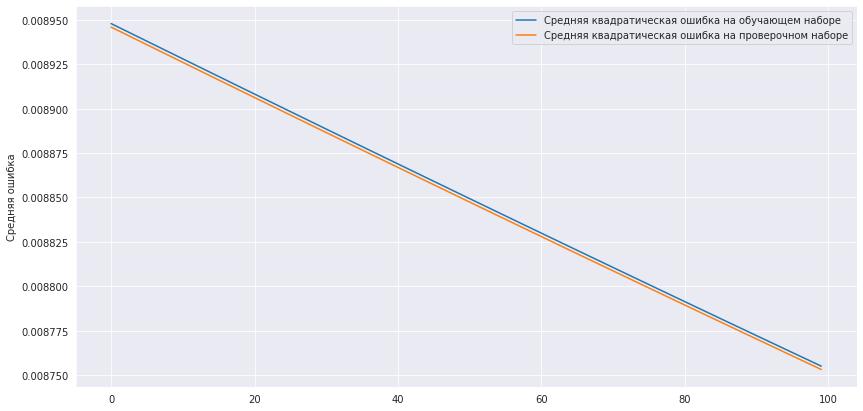

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(historyD.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(historyD.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

### Прогноз данных, отображение на графике

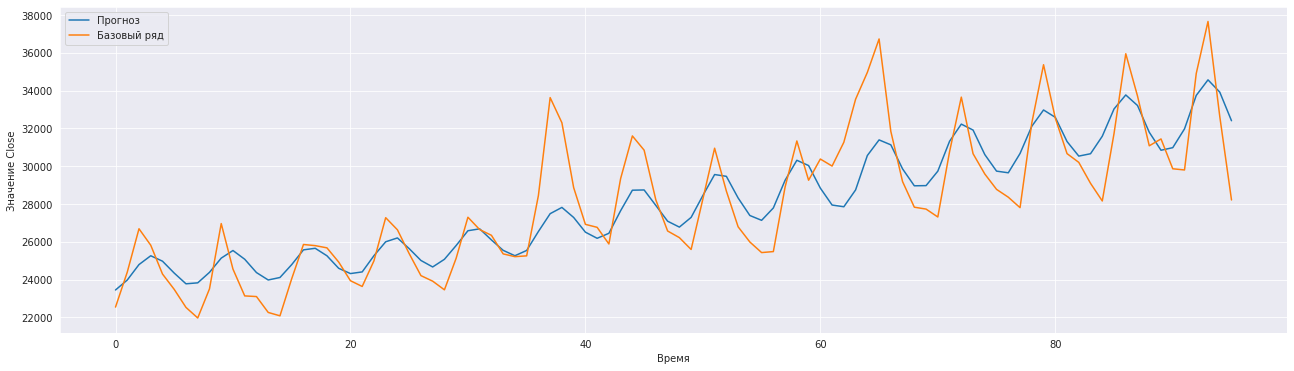

In [ ]:
(predVal_D, yValUnscaled_D) = getPred(modelD, xVal[0], yVal[0], yScaler)   # Прогноз данных
showPredict(0, 160, 0, predVal_D, yValUnscaled_D)

### График корреляции

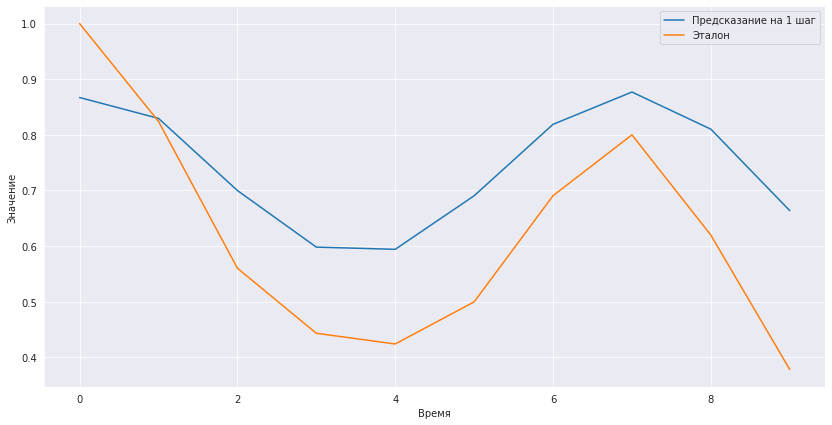

In [ ]:
showCorr([0], 10, predVal_D, yValUnscaled_D)

### График корреляции со смещением шага

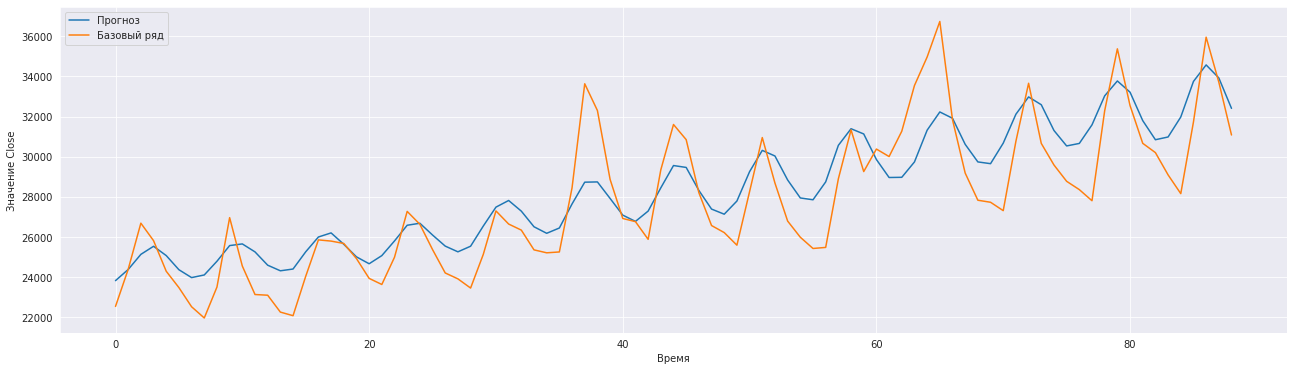

In [ ]:
showPredict(0,160,0, predVal_D[7:], yValUnscaled_D[:-7])

Как видно из графиков Прогноз не сильно совпадает с базовым рядом. Поэтому попробуем с другой архитектурой сети.

# Одномерная свертка Conv1D

In [ ]:
modelC = Sequential()
modelC.add(Conv1D(64,5, input_shape=(xLen,1), activation='relu'))
modelC.add(Conv1D(64,5, activation='relu'))
modelC.add(MaxPooling1D())
modelC.add(Flatten())
modelC.add(Dense(150,activation='relu'))
modelC.add(Dense(1, activation='linear'))

modelC.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

## Шаг обучения lr=1e-4

In [ ]:
historyC = modelC.fit(trainDataGen, epochs=100, verbose=1, validation_data=testDataGen) 

Epoch 1/100
41/41 [==============================] - 1s 13ms/step - loss: 0.0310 - val_loss: 0.0766
Epoch 2/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0116 - val_loss: 0.0296
Epoch 3/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0137 - val_loss: 0.0420
Epoch 4/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0113 - val_loss: 0.0258
Epoch 5/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0103 - val_loss: 0.0200
Epoch 6/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0087 - val_loss: 0.0318
Epoch 7/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0083 - val_loss: 0.0142
Epoch 8/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0077 - val_loss: 0.0336
Epoch 9/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0068 - val_loss: 0.0269
Epoch 10/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0067 - val_loss: 0.0188

## Меняем шаг обучения lr=1e-5

In [ ]:
modelC.compile(loss='mse', optimizer=Adam(learning_rate=1e-5))
historyC = modelC.fit(trainDataGen, epochs=100, verbose=1, validation_data=testDataGen)

Epoch 1/100
41/41 [==============================] - 1s 11ms/step - loss: 0.0013 - val_loss: 0.0060
Epoch 2/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0061
Epoch 3/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0059
Epoch 4/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0057
Epoch 5/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0060
Epoch 6/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0058
Epoch 7/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0058
Epoch 8/100
41/41 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 9/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0057
Epoch 10/100
41/41 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 0.0059
Epoch

#### График lr=1e-5

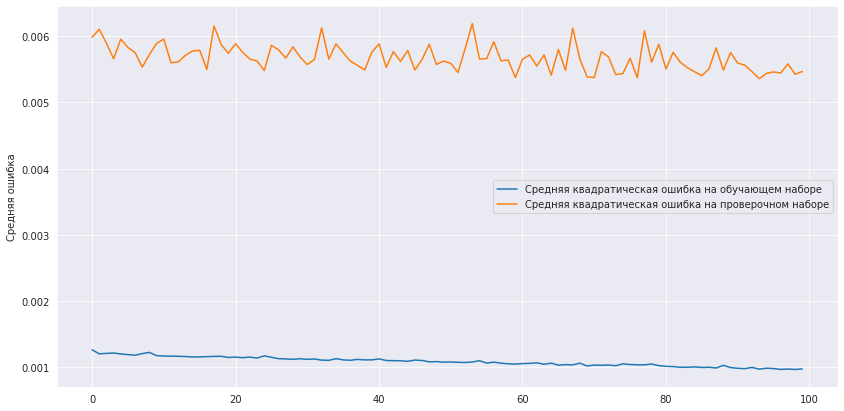

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(historyC.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(historyC.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

## Прогноз данных, отображение на графике (lr=1e-5)

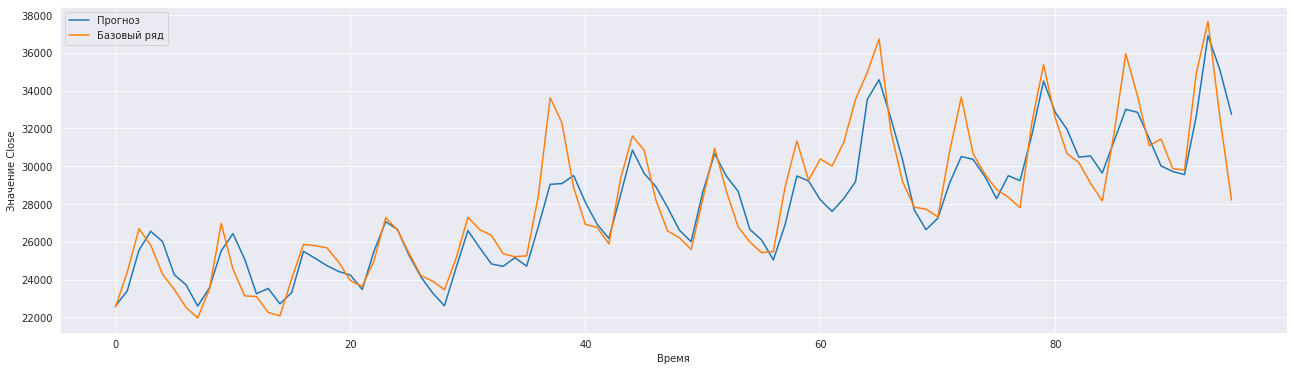

In [ ]:
(predVal_C, yValUnscaled_C) = getPred(modelC, xVal[0], yVal[0], yScaler)  
showPredict(0,160,0, predVal_C, yValUnscaled_C)

## График корреляции (lr=1e-5)

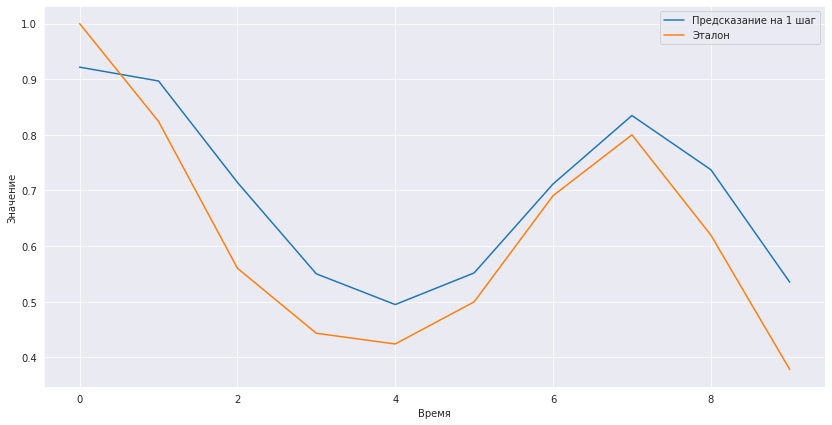

In [ ]:
showCorr([0], 10, predVal_C, yValUnscaled_C)

## График корреляции со смещением шага (lr=1e-5)

Смещение шага не даст результата, так как из графика выше видно, что значение автокорреляции падает со следующими шагами.

# LSTM сеть

Посмотрим как с этой задачей справится сеть **LSTM** 

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(5, input_shape=(xLen,1)))
model_LSTM.add(Dense(50, activation='relu'))
model_LSTM.add(Dense(1, activation='linear'))

model_LSTM.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

In [ ]:
history_LSTM = model_LSTM.fit(trainDataGen, epochs=100, verbose=1, validation_data=testDataGen)

Epoch 1/100
41/41 [==============================] - 1s 18ms/step - loss: 0.1246 - val_loss: 0.4080
Epoch 2/100
41/41 [==============================] - 1s 18ms/step - loss: 0.1081 - val_loss: 0.3684
Epoch 3/100
41/41 [==============================] - 1s 18ms/step - loss: 0.0923 - val_loss: 0.3295
Epoch 4/100
41/41 [==============================] - 1s 18ms/step - loss: 0.0789 - val_loss: 0.2949
Epoch 5/100
41/41 [==============================] - 1s 19ms/step - loss: 0.0679 - val_loss: 0.2643
Epoch 6/100
41/41 [==============================] - 1s 18ms/step - loss: 0.0586 - val_loss: 0.2375
Epoch 7/100
41/41 [==============================] - 1s 18ms/step - loss: 0.0510 - val_loss: 0.2130
Epoch 8/100
41/41 [==============================] - 1s 18ms/step - loss: 0.0447 - val_loss: 0.1924
Epoch 9/100
41/41 [==============================] - 1s 18ms/step - loss: 0.0399 - val_loss: 0.1730
Epoch 10/100
41/41 [==============================] - 1s 18ms/step - loss: 0.0361 - val_loss: 0.1586

## Меняем шаг обучения lr=1e-5

In [ ]:
model_LSTM.compile(loss='mse', optimizer=Adam(learning_rate=1e-5))
history_LSTM = model_LSTM.fit(trainDataGen, epochs=50, verbose=1, validation_data=testDataGen)

Epoch 1/50
41/41 [==============================] - 2s 27ms/step - loss: 0.0054 - val_loss: 0.0185
Epoch 2/50
41/41 [==============================] - 1s 18ms/step - loss: 0.0054 - val_loss: 0.0185
Epoch 3/50
41/41 [==============================] - 1s 18ms/step - loss: 0.0054 - val_loss: 0.0185
Epoch 4/50
41/41 [==============================] - 1s 19ms/step - loss: 0.0054 - val_loss: 0.0184
Epoch 5/50
41/41 [==============================] - 1s 19ms/step - loss: 0.0054 - val_loss: 0.0184
Epoch 6/50
41/41 [==============================] - 1s 19ms/step - loss: 0.0054 - val_loss: 0.0184
Epoch 7/50
41/41 [==============================] - 1s 19ms/step - loss: 0.0054 - val_loss: 0.0183
Epoch 8/50
41/41 [==============================] - 1s 19ms/step - loss: 0.0054 - val_loss: 0.0183
Epoch 9/50
41/41 [==============================] - 1s 18ms/step - loss: 0.0054 - val_loss: 0.0184
Epoch 10/50
41/41 [==============================] - 1s 18ms/step - loss: 0.0054 - val_loss: 0.0182
Epoch 11/

#### График lr=1e-5

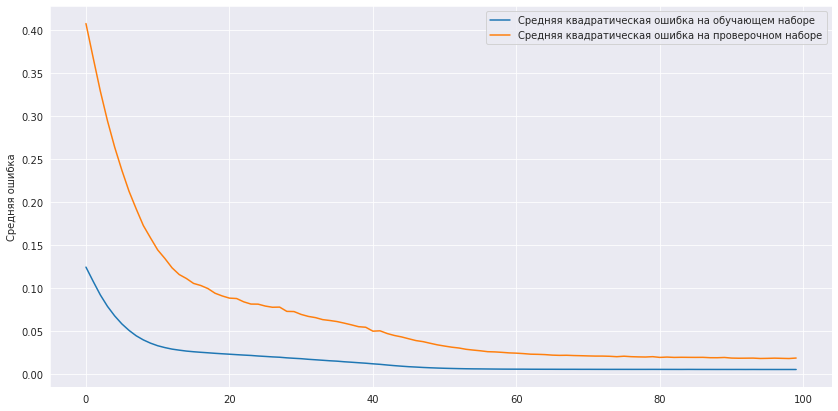

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history_LSTM.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(history_LSTM.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

## Прогноз данных, отображение на графике (lr=1e-5)

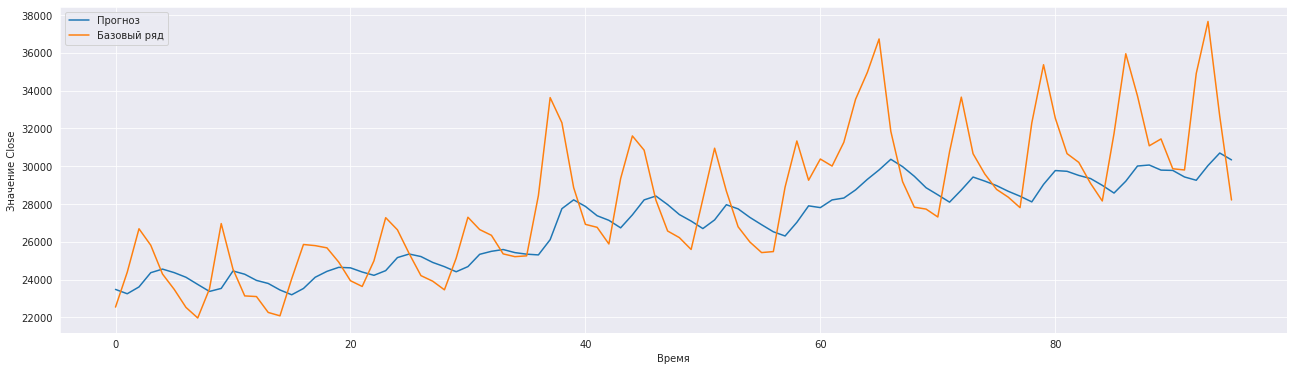

In [ ]:
(predVal_LSTM, yValUnscaled_LSTM) = getPred(model_LSTM, xVal[0], yVal[0], yScaler)  
showPredict(0,160,0, predVal_LSTM, yValUnscaled_LSTM)

## График корреляции (lr=1e-5)

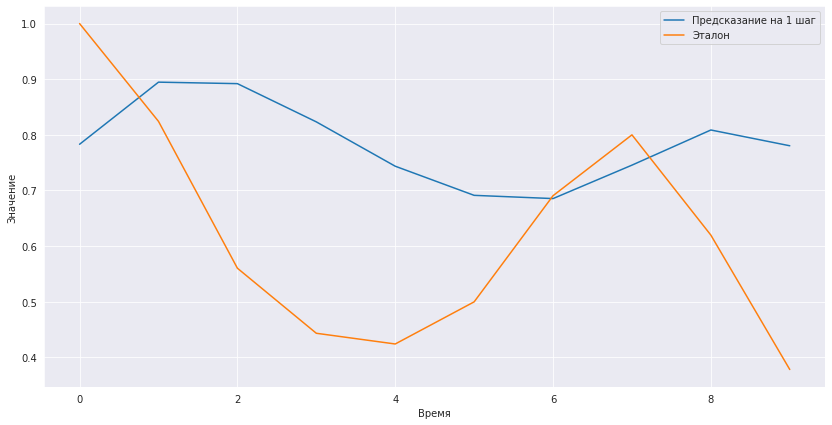

In [ ]:
showCorr([0], 10, predVal_LSTM, yValUnscaled_LSTM)

## График корреляции со смещением шага (lr=1e-5)

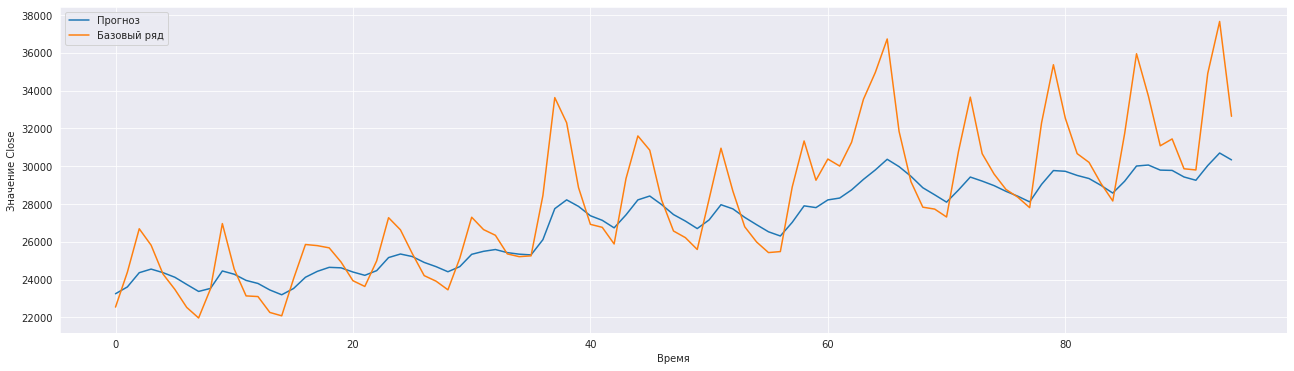

In [ ]:
showPredict(0,160,0, predVal_LSTM[1:], yValUnscaled_LSTM[:-1])

# Промежуточные выводы:

1. Лучшую точность показала сеть с одномернрой сверткой Conv1D
2. При должном подборе архитектуры сети с Dense слоем и LSTM слоем, а также подбором гиперпараметров, можно добить большей точности. 
3. Не смотря на хороший результат показанный нейронной сетью с Conv1D слоями, попробюуем улучшить точность предсказания. Для этого добавим новые **каналы**. 

# Работа с таблицей (добавление каналов)

In [ ]:
data_2 = pd.read_csv('/content/drive/MyDrive/Временные ряды/База трафик сайта/traff.csv', sep=',') 

In [ ]:
# Убираем колонку дата
data_2 = data_2.iloc[:,1:]

In [ ]:
# Зададим новое название столбца
data_2.columns=['Посещений']

Так же как и в начале убираем запятые и приводим к другому типу данных.

In [ ]:
for i in range(len(data_2)):
  data_2.iloc[i,0] = data_2.iloc[i,0].replace(',','')

In [ ]:
# Так как стоит точка, то нельзя сразу перевести в int, для этого сделаем двойное преобразование,
# Сначла в типо float, а затем в int.
data_2 = data_2.astype(float).astype(int)

In [ ]:
data_2.head(5)

,Посещений
0,29593
1,31726
2,32684
3,31820
4,29354


## Добавление каналов

**Вдобавок к имеющимся данным, добавим новые:**
 - Обратное значение канала
 - Первые производные канала
 - Вторые производные канала

In [ ]:
# Обратное значение канала x_new = 1/(x + 1e-3)

data_2['Rev'] = 1 / (data_2['Посещений'] + 0.001)


In [ ]:
# Первые производные канала (x[n] - x[n-1])
# х - это элемент столбца, а n - это его порядковый номер

data_2['diff'] = data_2.iloc[:,0].diff()

In [ ]:
# Вторые производные канала (x[n] - 2*x[n-1] + x[n-2])
# Сначала создадим пустой столбец, так как производные второго порядка, 
# то заносить в таблицу будем начиная со второй строки
data_2['diff_2'] = np.nan
data_2['diff_2'][2:] = np.diff(data_2['Посещений'], 2)

In [ ]:
# Заменим значение NaN в первых строках на ноль
data_2.fillna(0, inplace=True)

# Удалять первые строки не будем

Посмотрим на полученный результат

In [ ]:
# Общая таблица
data_2.head(5)

,Посещений,Rev,diff,diff_2
0,29593,0.000034,0.0,0.0
1,31726,0.000032,2133.0,0.0
2,32684,0.000031,958.0,-1175.0
3,31820,0.000031,-864.0,-1822.0
4,29354,0.000034,-2466.0,-1602.0


In [ ]:
# Общий размер таблицы
data_2.shape

(1094, 4)

In [ ]:
# Сохраним полученную таблицу, чтобы не приходилось каждый раз делать вычисления

np.save('/content/drive/MyDrive/Временные ряды/База трафик сайта/new_data', data_2)

# В формате csv
data_2.to_csv('/content/drive/MyDrive/Временные ряды/База трафик сайта/new_data.csv', encoding='utf-8', sep='\t')

In [ ]:
# При необходимости можно раскоментировать и загрузить таблицу
# data_2 = np.load('/content/drive/MyDrive/Временные ряды/База трафик сайта/new_data.csv', sep='\t') 

## Загрузка данных

Подготовка данных такая же как и выше, за исключением что в проверочную выборку нужно добавлять только первый столбец с кол-вом посещений.

Из задания: **xLen = 60**. 

In [ ]:
# Для начала переведем в numpy массив
data = np.array(data_2)

In [ ]:
xLen = 60
valLen = 218   # Так как общая выборка составлят 1094, то возьмем примерно 20% на проверочную
trainLen = data.shape[0] - valLen

In [ ]:
xTrain, xTest = data[:trainLen], data[trainLen+xLen+2:]

In [ ]:
# Нормализация
xScaler = MinMaxScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)


In [ ]:
# Cделаем reshape, т.к. у нас только один столбец по одному значению
yTrain, yTest = np.reshape(data[:trainLen, 0],(-1,1)), np.reshape(data[trainLen+xLen+2:, 0], (-1,1))

In [ ]:
# Нормализация
yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)

In [ ]:
print('xTrain:', xTrain.shape)
print('xTest:', xTest.shape)
print('yTrain:', yTrain.shape)
print('yTest:', yTest.shape)

xTrain: (876, 4)
xTest: (156, 4)
yTrain: (876, 1)
yTest: (156, 1)


In [ ]:
# Создаем генератор для обучающей выборки
trainDataGen = TimeseriesGenerator (xTrain, yTrain, length=xLen, stride=1, sampling_rate=1, batch_size=10)

In [ ]:
# Аналогично для валидационной выборки
testDataGen = TimeseriesGenerator(xTest, yTest, length=xLen, stride=1, sampling_rate=1, batch_size=10)

In [ ]:
# Посмотрим на размеры 
print(trainDataGen[0][0].shape)
print(testDataGen[0][1].shape)

(10, 60, 4)
(10, 1)


In [ ]:
# Сразу получим значения и переведем в numpy массив для проверки
DataGen = TimeseriesGenerator(xTest, yTest, length=xLen, sampling_rate=1, batch_size=len(xTest))
xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])
xVal = np.array(xVal)
yVal = np.array(yVal)

***Необходимые функции объявлены выше. Нет смысла еще раз их повторять.***

# Новые серии экспериментов

Теперь подадим новые данные в теже самые нейронные сети. Архитектура и гиперпараметры будут такие же для чистоты экспериментов. 

## Нейронная сеть с Dense слоем



In [ ]:
modelD = Sequential()
modelD.add(Dense(150,input_shape=(xLen,4), activation='relu'))
modelD.add(Flatten())
modelD.add(Dense(1, activation='linear'))

modelD.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

### lr=1e-4

In [ ]:
historyD = modelD.fit(trainDataGen, epochs=200,verbose=1, validation_data=testDataGen)

Epoch 1/200
82/82 [==============================] - 1s 6ms/step - loss: 0.0494 - val_loss: 0.0346
Epoch 2/200
82/82 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.0351
Epoch 3/200
82/82 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.0222
Epoch 4/200
82/82 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.0251
Epoch 5/200
82/82 [==============================] - 0s 3ms/step - loss: 0.0069 - val_loss: 0.0203
Epoch 6/200
82/82 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0145
Epoch 7/200
82/82 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0151
Epoch 8/200
82/82 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0116
Epoch 9/200
82/82 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0117
Epoch 10/200
82/82 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0083
Epoch 11/

### Уменьшаем шаг обучения lr=1e-5

In [ ]:
modelD.compile(loss='mse', optimizer=Adam(learning_rate=1e-5))
historyD = modelD.fit(trainDataGen, epochs=200, verbose=1, validation_data=testDataGen)

Epoch 1/200
82/82 [==============================] - 1s 4ms/step - loss: 9.2946e-04 - val_loss: 0.0055
Epoch 2/200
82/82 [==============================] - 0s 3ms/step - loss: 9.1800e-04 - val_loss: 0.0055
Epoch 3/200
82/82 [==============================] - 0s 3ms/step - loss: 8.9484e-04 - val_loss: 0.0054
Epoch 4/200
82/82 [==============================] - 0s 3ms/step - loss: 9.0281e-04 - val_loss: 0.0055
Epoch 5/200
82/82 [==============================] - 0s 3ms/step - loss: 8.9781e-04 - val_loss: 0.0055
Epoch 6/200
82/82 [==============================] - 0s 3ms/step - loss: 8.9469e-04 - val_loss: 0.0056
Epoch 7/200
82/82 [==============================] - 0s 3ms/step - loss: 8.8625e-04 - val_loss: 0.0053
Epoch 8/200
82/82 [==============================] - 0s 3ms/step - loss: 8.9869e-04 - val_loss: 0.0055
Epoch 9/200
82/82 [==============================] - 0s 3ms/step - loss: 8.9042e-04 - val_loss: 0.0054
Epoch 10/200
82/82 [==============================] - 0s 3ms/step - loss:

### Уменьшаем шаг обучения lr=1e-6

In [ ]:
modelD.compile(loss='mse', optimizer=Adam(learning_rate=1e-6))
historyD = modelD.fit(trainDataGen, epochs=100, verbose=1, validation_data=testDataGen)

Epoch 1/100
82/82 [==============================] - 1s 4ms/step - loss: 8.1053e-04 - val_loss: 0.0055
Epoch 2/100
82/82 [==============================] - 0s 3ms/step - loss: 8.0930e-04 - val_loss: 0.0056
Epoch 3/100
82/82 [==============================] - 0s 3ms/step - loss: 8.0903e-04 - val_loss: 0.0056
Epoch 4/100
82/82 [==============================] - 0s 3ms/step - loss: 8.0891e-04 - val_loss: 0.0056
Epoch 5/100
82/82 [==============================] - 0s 3ms/step - loss: 8.0869e-04 - val_loss: 0.0056
Epoch 6/100
82/82 [==============================] - 0s 3ms/step - loss: 8.0897e-04 - val_loss: 0.0055
Epoch 7/100
82/82 [==============================] - 0s 3ms/step - loss: 8.0804e-04 - val_loss: 0.0056
Epoch 8/100
82/82 [==============================] - 0s 3ms/step - loss: 8.0839e-04 - val_loss: 0.0056
Epoch 9/100
82/82 [==============================] - 0s 3ms/step - loss: 8.0765e-04 - val_loss: 0.0055
Epoch 10/100
82/82 [==============================] - 0s 3ms/step - loss:

#### График lr=1e-6

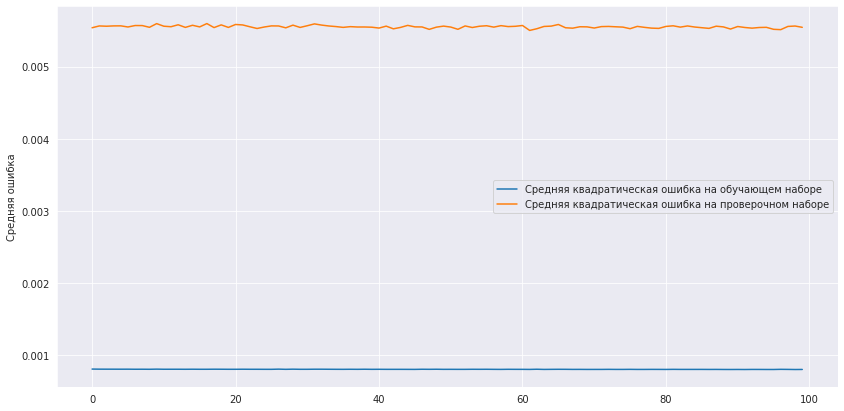

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(historyD.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(historyD.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

### Прогноз данных, отображение на графике

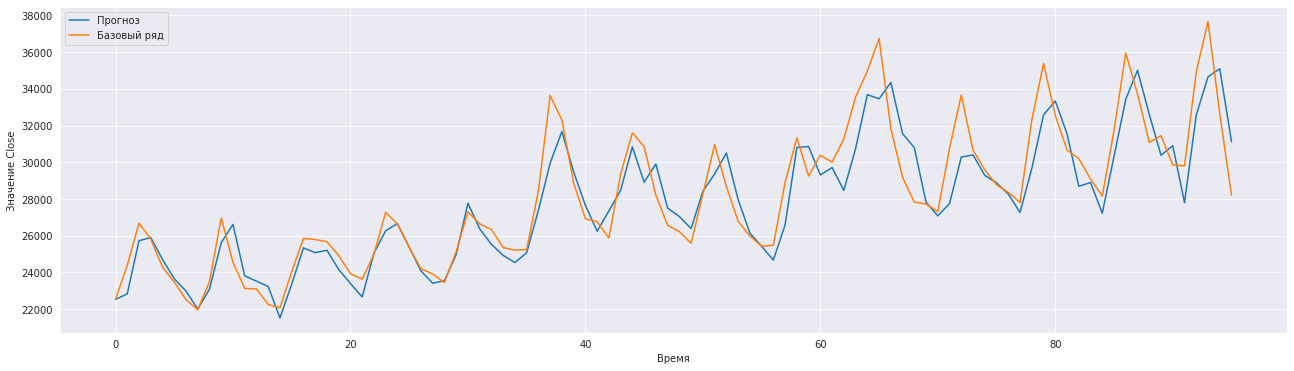

In [ ]:
(predVal_D, yValUnscaled_D) = getPred(modelD, xVal[0], yVal[0], yScaler)   # Прогноз данных
showPredict(0, 160, 0, predVal_D, yValUnscaled_D)

### График корреляции

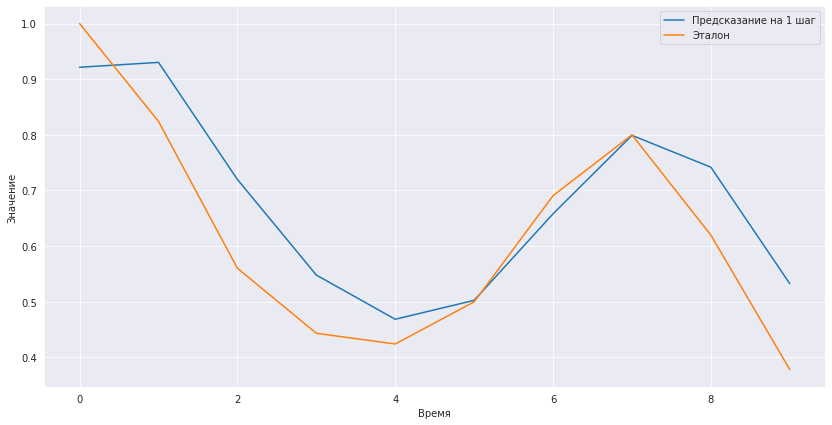

In [ ]:
showCorr([0], 10, predVal_D, yValUnscaled_D)

### График корреляции со смещением шага

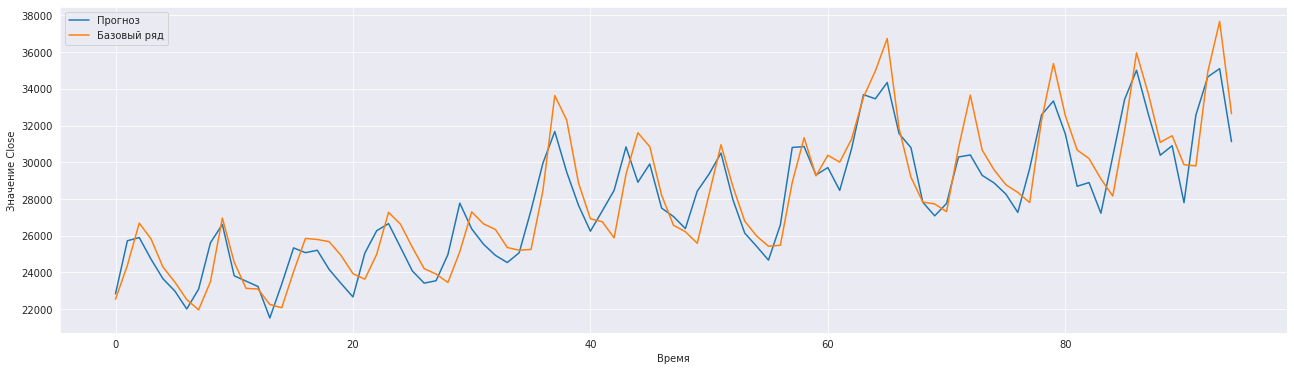

In [ ]:
showPredict(0,160,0, predVal_D[1:], yValUnscaled_D[:-1])

# Одномерная свертка Conv1D

In [ ]:
modelC = Sequential()
modelC.add(Conv1D(64,5, input_shape=(xLen,4), activation='relu'))
modelC.add(Conv1D(64,5, activation='relu'))
modelC.add(MaxPooling1D())
modelC.add(Flatten())
modelC.add(Dense(150,activation='relu'))
modelC.add(Dense(1, activation='linear'))

modelC.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

## Шаг обучения lr=1e-4

In [ ]:
historyC = modelC.fit(trainDataGen, epochs=100, verbose=1, validation_data=testDataGen) 

Epoch 1/100
82/82 [==============================] - 1s 10ms/step - loss: 0.0429 - val_loss: 0.0419
Epoch 2/100
82/82 [==============================] - 1s 8ms/step - loss: 0.0120 - val_loss: 0.0419
Epoch 3/100
82/82 [==============================] - 1s 8ms/step - loss: 0.0103 - val_loss: 0.0286
Epoch 4/100
82/82 [==============================] - 1s 8ms/step - loss: 0.0087 - val_loss: 0.0213
Epoch 5/100
82/82 [==============================] - 1s 8ms/step - loss: 0.0089 - val_loss: 0.0212
Epoch 6/100
82/82 [==============================] - 1s 8ms/step - loss: 0.0064 - val_loss: 0.0135
Epoch 7/100
82/82 [==============================] - 1s 8ms/step - loss: 0.0066 - val_loss: 0.0192
Epoch 8/100
82/82 [==============================] - 1s 8ms/step - loss: 0.0069 - val_loss: 0.0146
Epoch 9/100
82/82 [==============================] - 1s 8ms/step - loss: 0.0058 - val_loss: 0.0095
Epoch 10/100
82/82 [==============================] - 1s 8ms/step - loss: 0.0058 - val_loss: 0.0172
Epoch 11

## Меняем шаг обучения lr=1e-5

In [ ]:
modelC.compile(loss='mse', optimizer=Adam(learning_rate=1e-5))
historyC = modelC.fit(trainDataGen, epochs=100, verbose=1, validation_data=testDataGen)

Epoch 1/100
82/82 [==============================] - 1s 10ms/step - loss: 2.4579e-04 - val_loss: 0.0097
Epoch 2/100
82/82 [==============================] - 1s 9ms/step - loss: 2.1671e-04 - val_loss: 0.0101
Epoch 3/100
82/82 [==============================] - 1s 8ms/step - loss: 1.9553e-04 - val_loss: 0.0099
Epoch 4/100
82/82 [==============================] - 1s 8ms/step - loss: 1.8264e-04 - val_loss: 0.0096
Epoch 5/100
82/82 [==============================] - 1s 8ms/step - loss: 1.8707e-04 - val_loss: 0.0097
Epoch 6/100
82/82 [==============================] - 1s 8ms/step - loss: 1.8554e-04 - val_loss: 0.0104
Epoch 7/100
82/82 [==============================] - 1s 8ms/step - loss: 1.7979e-04 - val_loss: 0.0101
Epoch 8/100
82/82 [==============================] - 1s 8ms/step - loss: 1.7097e-04 - val_loss: 0.0099
Epoch 9/100
82/82 [==============================] - 1s 8ms/step - loss: 1.6389e-04 - val_loss: 0.0100
Epoch 10/100
82/82 [==============================] - 1s 8ms/step - loss

#### График lr=1e-5

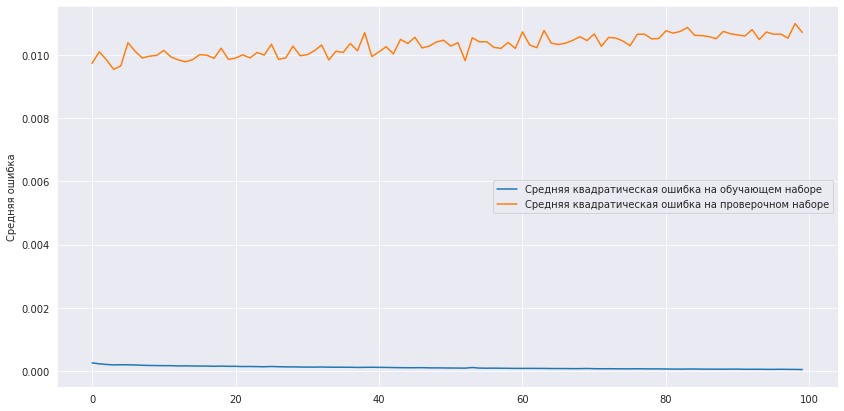

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(historyC.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(historyC.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

## Прогноз данных, отображение на графике (lr=1e-5)

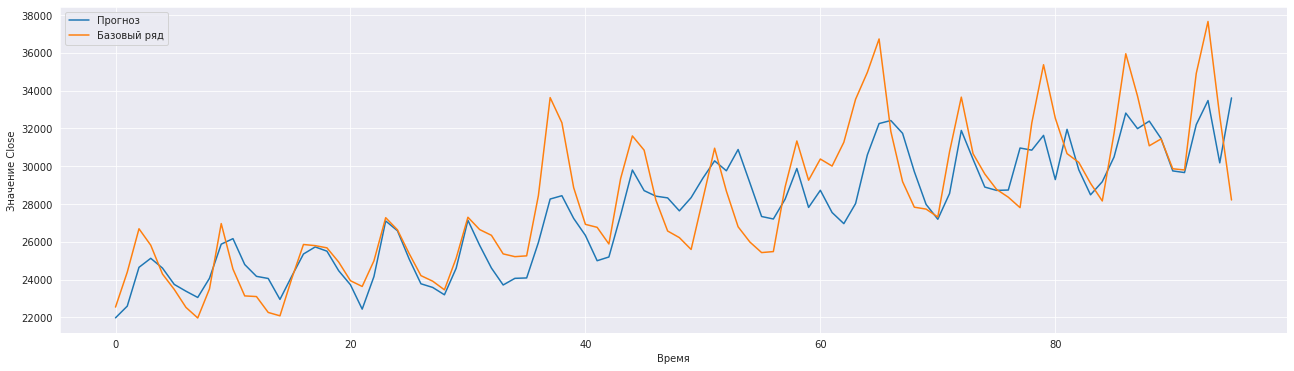

In [ ]:
(predVal_C, yValUnscaled_C) = getPred(modelC, xVal[0], yVal[0], yScaler)  
showPredict(0,160,0, predVal_C, yValUnscaled_C)

## График корреляции (lr=1e-5)

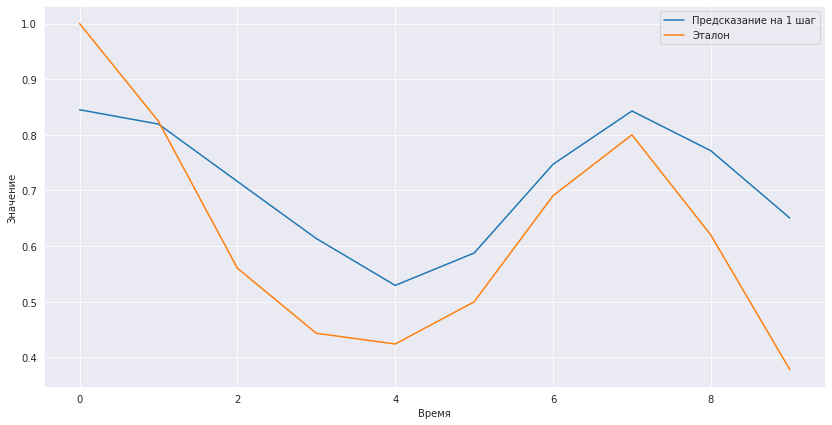

In [ ]:
showCorr([0], 10, predVal_C, yValUnscaled_C)

## График корреляции со смещением шага (lr=1e-5)

Смещение шага не даст результата, так как из графика выше видно, что значение автокорреляции падает со следующими шагами.

# LSTM сеть

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(5, input_shape=(xLen,4)))
model_LSTM.add(Dense(50, activation='relu'))
model_LSTM.add(Dense(1, activation='linear'))

model_LSTM.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))

In [ ]:
history_LSTM = model_LSTM.fit(trainDataGen, epochs=100, verbose=1, validation_data=testDataGen)

Epoch 1/100
82/82 [==============================] - 4s 24ms/step - loss: 0.1979 - val_loss: 0.5715
Epoch 2/100
82/82 [==============================] - 2s 20ms/step - loss: 0.1525 - val_loss: 0.4892
Epoch 3/100
82/82 [==============================] - 2s 20ms/step - loss: 0.1142 - val_loss: 0.4106
Epoch 4/100
82/82 [==============================] - 2s 20ms/step - loss: 0.0838 - val_loss: 0.3335
Epoch 5/100
82/82 [==============================] - 2s 19ms/step - loss: 0.0617 - val_loss: 0.2731
Epoch 6/100
82/82 [==============================] - 2s 20ms/step - loss: 0.0478 - val_loss: 0.2231
Epoch 7/100
82/82 [==============================] - 2s 20ms/step - loss: 0.0390 - val_loss: 0.1835
Epoch 8/100
82/82 [==============================] - 2s 20ms/step - loss: 0.0333 - val_loss: 0.1586
Epoch 9/100
82/82 [==============================] - 2s 20ms/step - loss: 0.0292 - val_loss: 0.1342
Epoch 10/100
82/82 [==============================] - 2s 20ms/step - loss: 0.0260 - val_loss: 0.1181

## Меняем шаг обучения lr=1e-5

In [ ]:
model_LSTM.compile(loss='mse', optimizer=Adam(learning_rate=1e-5))
history_LSTM = model_LSTM.fit(trainDataGen, epochs=50, verbose=1, validation_data=testDataGen)

Epoch 1/50
82/82 [==============================] - 4s 25ms/step - loss: 0.0032 - val_loss: 0.0090
Epoch 2/50
82/82 [==============================] - 2s 20ms/step - loss: 0.0032 - val_loss: 0.0090
Epoch 3/50
82/82 [==============================] - 2s 20ms/step - loss: 0.0032 - val_loss: 0.0089
Epoch 4/50
82/82 [==============================] - 2s 20ms/step - loss: 0.0032 - val_loss: 0.0089
Epoch 5/50
82/82 [==============================] - 2s 20ms/step - loss: 0.0032 - val_loss: 0.0089
Epoch 6/50
82/82 [==============================] - 2s 20ms/step - loss: 0.0032 - val_loss: 0.0089
Epoch 7/50
82/82 [==============================] - 2s 20ms/step - loss: 0.0032 - val_loss: 0.0089
Epoch 8/50
82/82 [==============================] - 2s 20ms/step - loss: 0.0032 - val_loss: 0.0089
Epoch 9/50
82/82 [==============================] - 2s 20ms/step - loss: 0.0032 - val_loss: 0.0090
Epoch 10/50
82/82 [==============================] - 2s 20ms/step - loss: 0.0032 - val_loss: 0.0089
Epoch 11/

#### График lr=1e-5

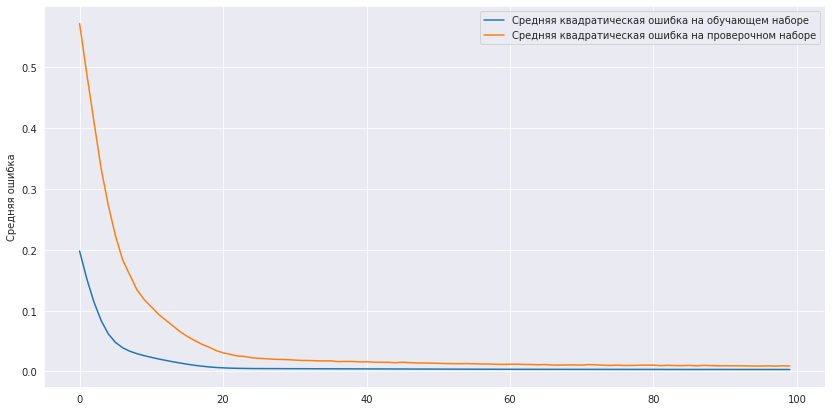

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history_LSTM.history['loss'], label='Средняя квадратическая ошибка на обучающем наборе')
plt.plot(history_LSTM.history['val_loss'], label='Средняя квадратическая ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

## Прогноз данных, отображение на графике (lr=1e-5)

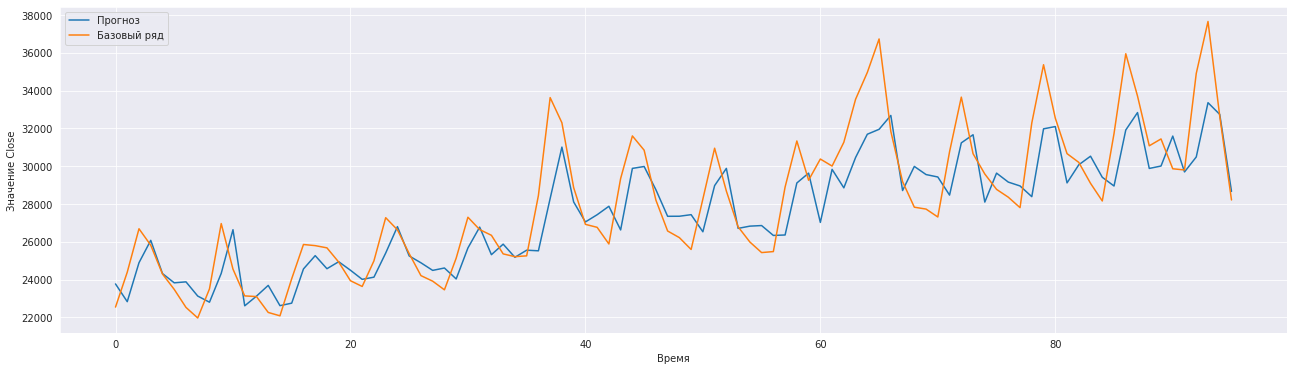

In [ ]:
(predVal_LSTM, yValUnscaled_LSTM) = getPred(model_LSTM, xVal[0], yVal[0], yScaler)  
showPredict(0,160,0, predVal_LSTM, yValUnscaled_LSTM)

## График корреляции (lr=1e-5)

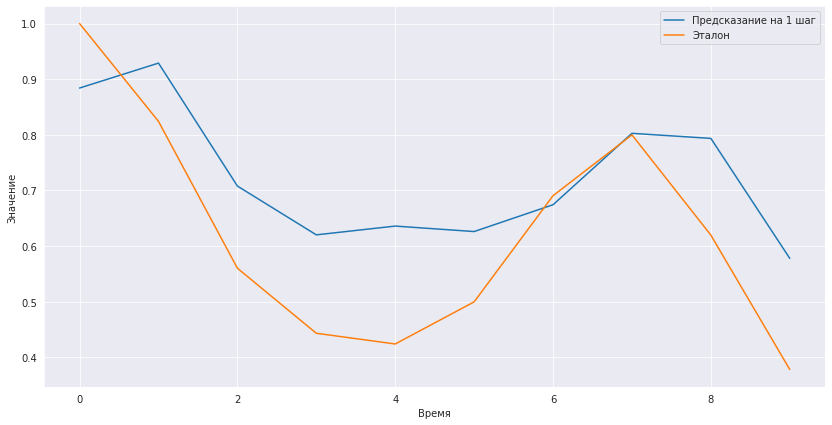

In [ ]:
showCorr([0], 10, predVal_LSTM, yValUnscaled_LSTM)

## График корреляции со смещением шага (lr=1e-5)

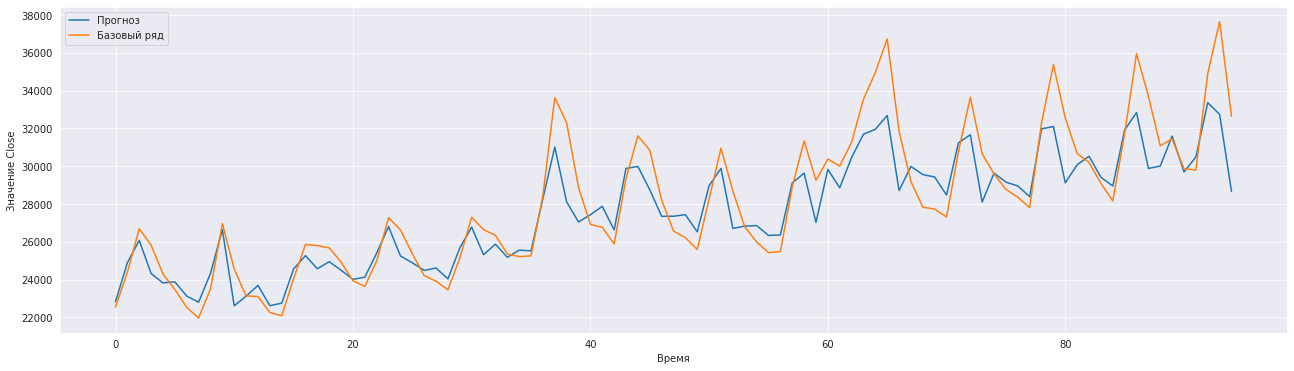

In [ ]:
showPredict(0,160,0, predVal_LSTM[1:], yValUnscaled_LSTM[:-1])

# Выводы:

1. С первоначальной таблицей лучше всех результат показала себя нейронная сеть с одномерной сверткой **Conv1D**.
2. Для получения более точного прогноза требуется работа с таблицей и увеличение подаваемых данных.
3. Нейронная сеть с **Dense** слоем, после увеличения таблицы показала результат как **Conv1D** из первого эксперимента.
4. Хуже всех показала себя сеть с **LSTM.**
5. D связи с тем что данных не много сеть обучается очень быстро, тем самым можно проводить множество экспериментов. 
6. Домашняя работа показала, что не достаточно только изменять архитектуру сети и гиперпараметры, а требуется работа с входными данными. 